# California Housing Price Prediction - Linear Regression Model

## Introduction
This project applies Linear Regression to predict house prices using the California Housing dataset. 
The goal is to explore feature engineering, model performance evaluation, and multicollinearity.

## 1. Importing Libraries & Loading Dataset

In [1]:
# Import necessary libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
housing = fetch_california_housing()

# Convert a DataFrame for easier manipulation
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target

# Show the first few rows of the DataFrame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


We first import necessary libraries and load the dataset into a Pandas DataFrame.

## 2. Data Exploration

In [2]:
# Get basic summary statistics of the dataset
df.describe()

# Get information on data types, missing values, etc.
df.info()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

We check for missing values and explore dataset statistics before model training.

## 3. Splitting Data for Training & Testing

In [3]:
# Split the data into features (X) and target (Y)
X = df.drop("target", axis=1) # Drop the target column
y = df["target"]  # This is the target column

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (16512, 8)
Testing data shape: (4128, 8)


We separate features and target variables, then split data into training (80%) and testing (20%).

## 4. Training the Linear Regression Model

In [4]:
# Initalize the model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Show the first few predicted values and actual values
print("Predicted values:", y_pred[:5])
print("Actual values:", y_test[:5].values)

Predicted values: [0.71912284 1.76401657 2.70965883 2.83892593 2.60465725]
Actual values: [0.477   0.458   5.00001 2.186   2.78   ]


We train a simple Linear Regression model on the dataset and make predictions.

## 5. Evaluating the Model Performance

In [5]:
# Evaluate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error (MSE): 0.5559
Mean Absolute Error (MAE): 0.5332
R² Score: 0.5758


We calculate MSE, MAE, and R² to measure model accuracy.

## 6. Feature Correlation & Multicollinearity

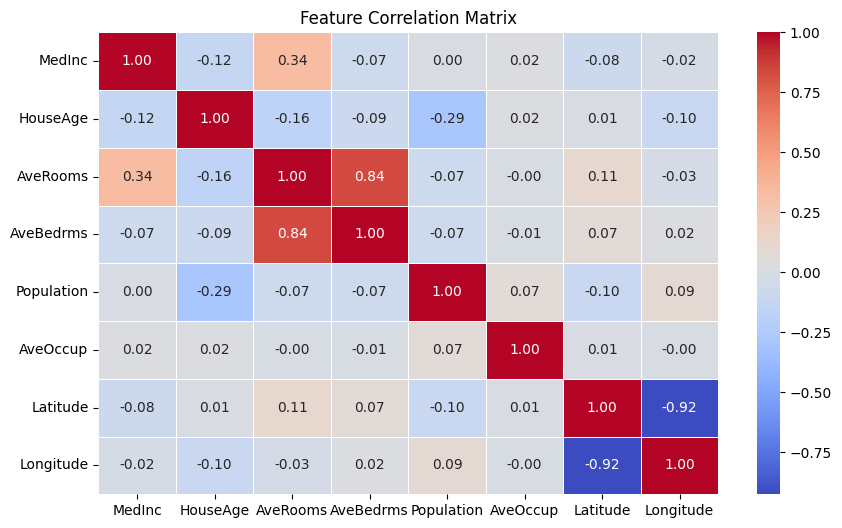

      Feature         VIF
0      MedInc   11.831609
1    HouseAge    7.155405
2    AveRooms   46.792373
3   AveBedrms   48.332634
4  Population    2.915730
5    AveOccup    1.080609
6    Latitude  560.583263
7   Longitude  641.224254


In [6]:
# Compute correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(X_train.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

# Compute Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(vif_data)

We analyze feature correlations and calculate VIF to detect multicollinearity issues.

## 7. Feature Engineering & Removing Redundant Features

In [7]:
# Drop Longitude due to high VIF
df = df.drop("Longitude", axis=1)

# Recalculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = df.drop("target", axis=1).columns
vif_data["VIF"] = [variance_inflation_factor(df.drop("target", axis=1).values, i) for i in range(df.drop("target", axis=1).shape[1])]

print(vif_data)


      Feature        VIF
0      MedInc   9.865861
1    HouseAge   6.880512
2    AveRooms  42.192223
3   AveBedrms  39.768396
4  Population   2.793169
5    AveOccup   1.094908
6    Latitude  22.498755


We remove highly correlated features (Longitude) to improve model stability.

## 8. Retraining the Model After Feature Selection

In [8]:
# Update feature and target variables
X = df.drop("target", axis=1)
y = df["target"]

# Train-test split again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train new model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate new model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Updated MSE: {mse:.4f}")
print(f"Updated MAE: {mae:.4f}")
print(f"Updated R² Score: {r2:.4f}")


Updated MSE: 0.6370
Updated MAE: 0.5786
Updated R² Score: 0.5139


After feature selection, we retrain the model and compare performance metrics.

## 9. Polynomial Regression for Non-Linear Relationships

In [9]:
# Add polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Train-test split with polynomial features
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train polynomial model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions
y_pred_poly = model.predict(X_test_poly)

# Evaluate performance
mse_poly = mean_squared_error(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial MSE: {mse_poly:.4f}")
print(f"Polynomial MAE: {mae_poly:.4f}")
print(f"Polynomial R² Score: {r2_poly:.4f}")


Polynomial MSE: 0.5977
Polynomial MAE: 0.5279
Polynomial R² Score: 0.5439


We test polynomial regression to capture non-linear patterns and compare its performance.